In [ ]:
#importing libraries

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2

In [ ]:
#loading data set

In [5]:
data = pd.read_csv('fer2013.csv')

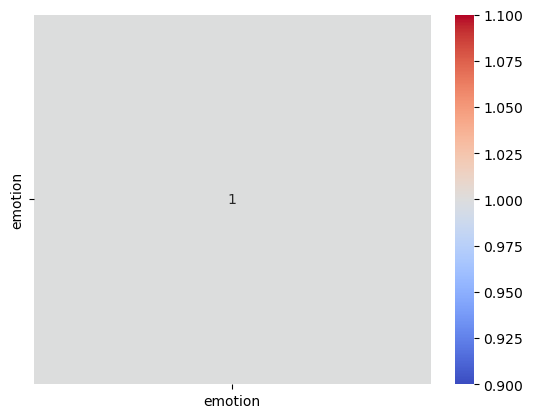

In [6]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

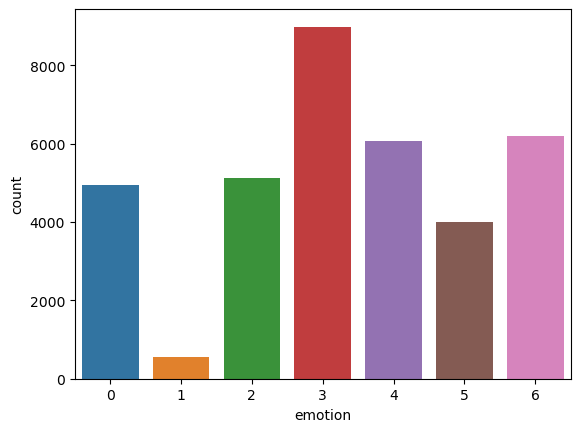

In [7]:
sns.countplot(x='emotion', data=data)

# Show the plot
plt.show()

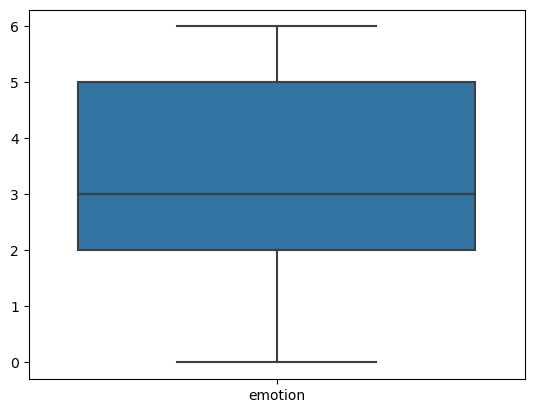

In [8]:
sns.boxplot(data=data)

# Show the plot
plt.show()

In [ ]:
# Preprocess the images and labels

In [9]:
images = []
labels = []
for i in range(len(data)):
    pixels = data['pixels'][i].split()
    image = np.array(pixels, dtype=np.uint8).reshape((48, 48))
    images.append(image)
    labels.append(data['emotion'][i])
    
images = np.array(images, dtype=np.float32)
images = np.expand_dims(images, axis=-1) / 255.0
labels = np.array(labels, dtype=np.int32)

In [ ]:
# Split the dataset into train, validation, and test sets

In [10]:
train_images, train_labels = images[:28000], labels[:28000]
val_images, val_labels = images[28000:32000], labels[28000:32000]
test_images, test_labels = images[32000:], labels[32000:]

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    epochs=50, batch_size=64)


Epoch 1/50
438/438 [==============================] - 97s 216ms/step - loss: 1.7582 - accuracy: 0.2862 - val_loss: 1.6085 - val_accuracy: 0.3758
Epoch 2/50
438/438 [==============================] - 99s 227ms/step - loss: 1.5808 - accuracy: 0.3819 - val_loss: 1.4863 - val_accuracy: 0.4340
Epoch 3/50
438/438 [==============================] - 91s 208ms/step - loss: 1.4694 - accuracy: 0.4289 - val_loss: 1.3825 - val_accuracy: 0.4795
Epoch 4/50
438/438 [==============================] - 87s 199ms/step - loss: 1.3968 - accuracy: 0.4623 - val_loss: 1.3235 - val_accuracy: 0.4935
Epoch 5/50
438/438 [==============================] - 85s 194ms/step - loss: 1.3464 - accuracy: 0.4855 - val_loss: 1.2771 - val_accuracy: 0.5140
Epoch 6/50
438/438 [==============================] - 85s 193ms/step - loss: 1.2927 - accuracy: 0.5086 - val_loss: 1.2490 - val_accuracy: 0.5217
Epoch 7/50
438/438 [==============================] - 84s 191ms/step - loss: 1.2539 - accuracy: 0.5215 - val_loss: 1.2417 - val_ac

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

122/122 [==============================] - 4s 30ms/step - loss: 1.9561 - accuracy: 0.1629
Test accuracy: 0.1628505289554596


In [14]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

122/122 [==============================] - 4s 31ms/step


In [15]:
cm = confusion_matrix(test_labels, y_pred)


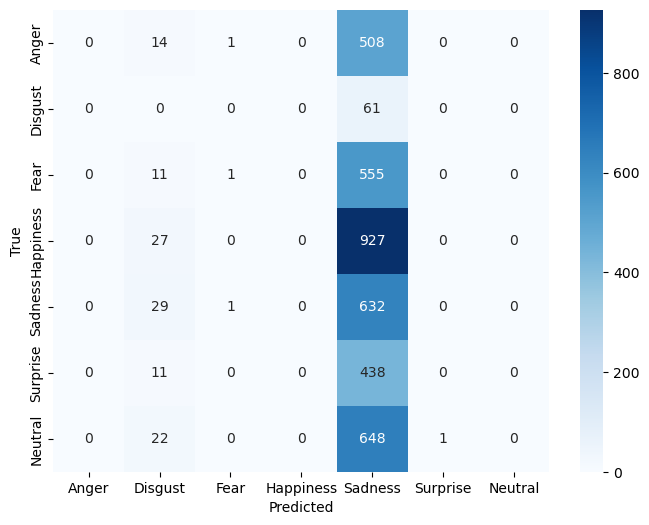

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral'], yticklabels=['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
print("Confusion matrix:")
print(confusion_matrix(test_labels, y_pred))
print()
print("Classification report:")
print(classification_report(test_labels, y_pred))

Confusion matrix:
[[  0  14   1   0 508   0   0]
 [  0   0   0   0  61   0   0]
 [  0  11   1   0 555   0   0]
 [  0  27   0   0 927   0   0]
 [  0  29   1   0 632   0   0]
 [  0  11   0   0 438   0   0]
 [  0  22   0   0 648   1   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       523
           1       0.00      0.00      0.00        61
           2       0.33      0.00      0.00       567
           3       0.00      0.00      0.00       954
           4       0.17      0.95      0.29       662
           5       0.00      0.00      0.00       449
           6       0.00      0.00      0.00       671

    accuracy                           0.16      3887
   macro avg       0.07      0.14      0.04      3887
weighted avg       0.08      0.16      0.05      3887



C:\Users\calvin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calvin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calvin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
